<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week4_Day4_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [25]:
df = pd.read_csv('/content/Apple Stock Prices (1981 to 2023).csv', index_col=0, parse_dates=True)
print(df.index)         # should show DateTimeIndex
print(df.head())        # verify data
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)



Index(['02/01/1981', '05/01/1981', '06/01/1981', '07/01/1981', '08/01/1981',
       '09/01/1981', '12/01/1981', '13/01/1981', '14/01/1981', '15/01/1981',
       ...
       '13/01/2023', '17/01/2023', '18/01/2023', '19/01/2023', '20/01/2023',
       '23/01/2023', '24/01/2023', '25/01/2023', '26/01/2023', '27/01/2023'],
      dtype='object', name='Date', length=10608)
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200


In [16]:
print(df.isnull().sum())
print(df.dtypes)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [17]:
print(df.columns.tolist())

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


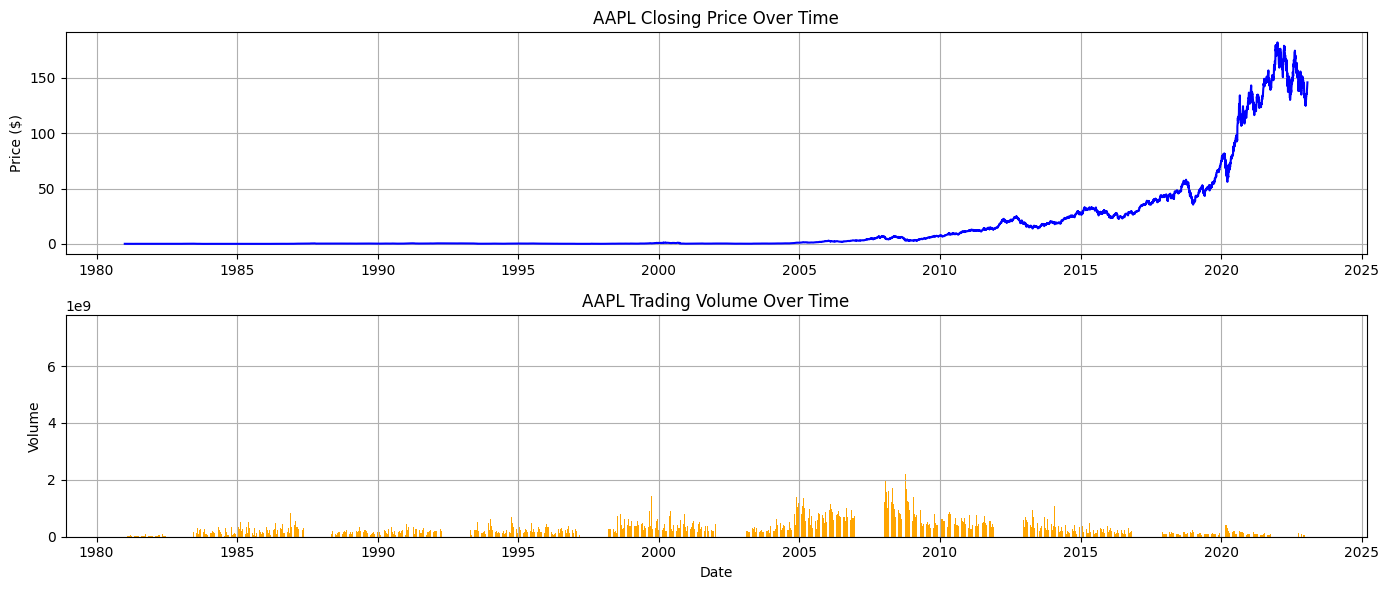

In [18]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 6))

# Closing Price
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Price Over Time')
plt.ylabel('Price ($)')
plt.grid(True)

# Volume
plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], label='Volume', color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()


In [20]:
# Create a Candlestick Chart
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


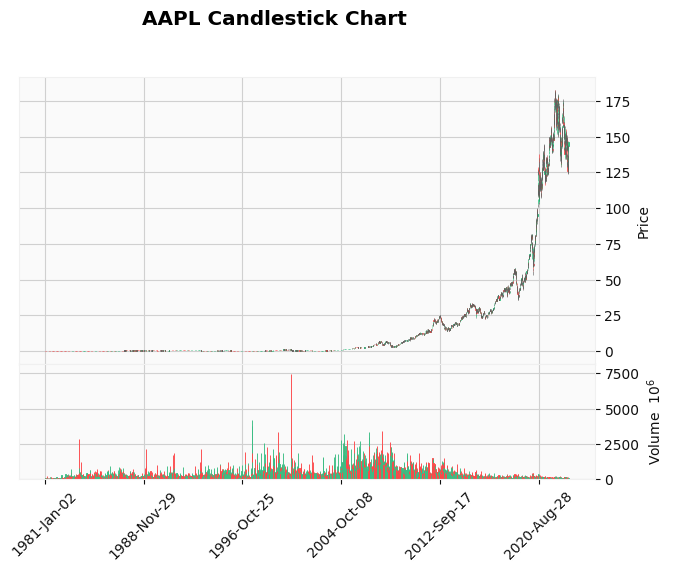

In [21]:
import mplfinance as mpf

# Ensure 'Date' is datetime index
df_candle = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Candlestick chart
mpf.plot(df_candle, type='candle', volume=True, style='yahoo', title='AAPL Candlestick Chart')


In [22]:
# Summary statistics
summary_stats = df[['Open', 'High', 'Low', 'Close', 'Volume']].agg(['mean', 'median', 'std'])
print(summary_stats)


             Open       High        Low      Close        Volume
mean    16.689173  16.879955  16.500822  16.697362  3.275098e+08
median   0.488839   0.495536   0.480446   0.487701  2.145976e+08
std     35.450519  35.882848  35.031289  35.473912  3.378203e+08


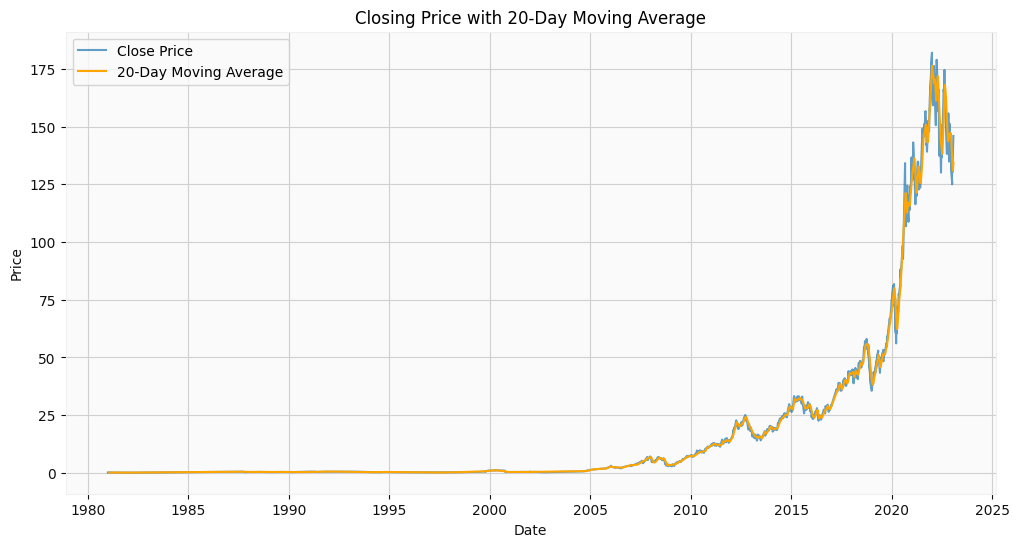

In [23]:
import matplotlib.pyplot as plt

# Compute 20-day moving average
df['MA20'] = df['Close'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.7)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange')
plt.title('Closing Price with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# T-test to compare average closing prices across different years
import pandas as pd
from scipy import stats

# Supposons que df est votre DataFrame avec une colonne 'Date' et 'Close'
# On commence par convertir 'Date' en datetime si ce n'est pas déjà fait
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extraire l'année dans une nouvelle colonne
df['Year'] = df['Date'].dt.year

# Choisissons 2 années à comparer, par exemple 2020 et 2021
year1 = 2020
year2 = 2021

# Extraire les prix de clôture pour ces deux années
close_year1 = df[df['Year'] == year1]['Close']
close_year2 = df[df['Year'] == year2]['Close']

# Vérifier que les deux groupes ont assez de données
print(f"Nombre de valeurs en {year1}:", len(close_year1))
print(f"Nombre de valeurs en {year2}:", len(close_year2))

# Exécuter le test t indépendant
t_stat, p_value = stats.ttest_ind(close_year1, close_year2, equal_var=False)  # equal_var=False si variances inégales

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interprétation simple
alpha = 0.05
if p_value < alpha:
    print("Les moyennes des prix de clôture entre les deux années sont significativement différentes.")
else:
    print("Pas de différence significative entre les moyennes des prix de clôture.")


Nombre de valeurs en 2020: 253
Nombre de valeurs en 2021: 252
T-statistic: -27.60930316076054
P-value: 3.406208868904525e-98
Les moyennes des prix de clôture entre les deux années sont significativement différentes.


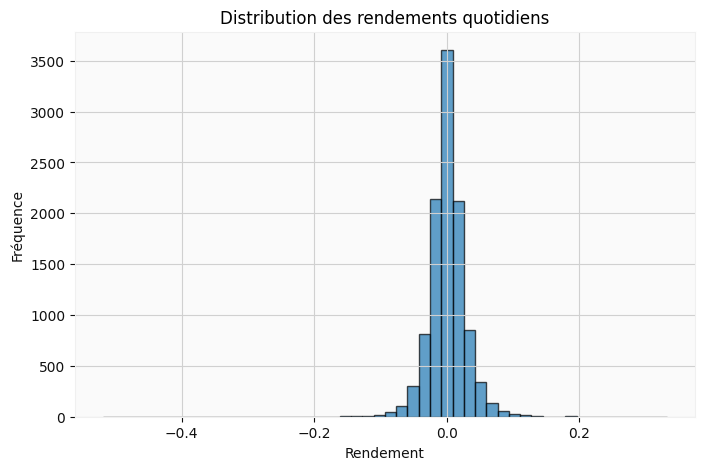

Statistique de Shapiro-Wilk: 0.9191
P-value: 0.0000
Les rendements ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10607.
  res = hypotest_fun_out(*samples, **kwds)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df est ton DataFrame avec une colonne 'Close' et 'Date' déjà datetime
df['Returns'] = df['Close'].pct_change()  # Calcul des rendements quotidiens
df = df.dropna()  # Supprimer les valeurs NA résultantes

# Visualiser la distribution des rendements
plt.figure(figsize=(8,5))
plt.hist(df['Returns'], bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution des rendements quotidiens")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

# Test de normalité - test de Shapiro
stat, p = stats.shapiro(df['Returns'])
print(f"Statistique de Shapiro-Wilk: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p > 0.05:
    print("Les rendements semblent suivre une distribution normale (on ne rejette pas H0)")
else:
    print("Les rendements ne suivent pas une distribution normale (on rejette H0)")
